# Ex. 13 from ISL

Collinearity refers to the situation in which two or more predictor variables are closely related to one another.

In [1]:
import numpy as np
from math import sqrt
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
import pandas as pd
plt.rcParams['figure.figsize'] = [10, 10]

a)

In [2]:
np.random.seed(1)
x_1 = np.random.uniform(size=100)
x_2 = 0.5 * x_1 + np.random.normal(size=100) / 10
y = 2 + 2 * x_1 + 0.3 * x_2 + np.random.normal(size=100)
df = pd.DataFrame({"y" : y, "x_1" : x_1, "x_2" : x_2})

- $ Y = 2 + 2X_{1} + 0.3X_{2}$
- $ \beta_0 = 2$
- $ \beta_1 = 2$
- $ \beta_2 = 0.3$

b)

In [4]:
df.corr()

,y,x_1,x_2
y,1.000000,0.473077,0.501172
x_1,0.473077,1.000000,0.839060
x_2,0.501172,0.839060,1.000000


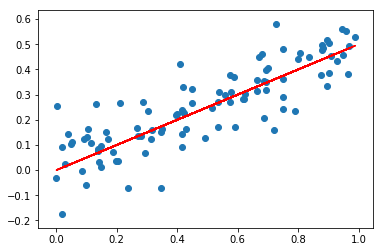

In [5]:
plt.scatter(x_1, x_2)
plt.plot(x_1, 0.5 * x_1, color="r")
plt.show()

c)
Null Hypothesis -- $H_{0}$ Denotes that there is no relationship between X and Y.  
To test the null hypothetis it is needed to determine whether estimator is sufficienlty far from zero that it is able to be confident that true value is non-zero. In practice a t-statistic is computed, which measures the number of standard deviations that estimator is away from 0. Having that $t$ it is possible to compute probability of observing any number equal to $|t|$ or larger. That probability is called p-value. Small p-value indicates that there is an association between the predictor and response. Thus null hypothesis is rejected. Typical cutoffs for rejecting the null hypothesis are 5 or 1%.  

$H_0:\beta_1 = 0$ -- accepted. p-value is $27.1\%$  
$H_0:\beta_2 = 0$ -- rejected. p-value is $3.1\%$ 

In [9]:
model = sm.ols(formula="y ~ x_1 + x_2", data=df)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.261
Model:                            OLS   Adj. R-squared:                  0.245
Method:                 Least Squares   F-statistic:                     17.09
Date:                Fri, 22 Nov 2019   Prob (F-statistic):           4.40e-07
Time:                        01:13:20   Log-Likelihood:                -142.34
No. Observations:                 100   AIC:                             290.7
Df Residuals:                      97   BIC:                             298.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.1893      0.199     11.021      0.000       1.795       2.584
x_1            0.7046      0.637      1.107      0.271      -0.559       1.968
x_2            2.5024      1.140      2.194      0.031       0.239       4.766
==============================================================================
Omnibus:                        0.607   Durbin-Watson:                   2.111
Prob(Omnibus):                  0.738   Jarque-Bera (JB):                0.577
Skew:                          -0.179   Prob(JB):                        0.749
Kurtosis:                       2.900   Cond. No.                         14.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

d)
$H_0:\beta_1 = 0$ -- rejected. p-value is $0\%$  

In [11]:
model2 = sm.ols(formula="y ~ x_1", data=df)
results2 = model2.fit()
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.224
Model:                            OLS   Adj. R-squared:                  0.216
Method:                 Least Squares   F-statistic:                     28.26
Date:                Fri, 22 Nov 2019   Prob (F-statistic):           6.68e-07
Time:                        01:50:42   Log-Likelihood:                -144.76
No. Observations:                 100   AIC:                             293.5
Df Residuals:                      98   BIC:                             298.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.2486      0.201     11.209      0.000       1.850       2.647
x_1            1.8770      0.353      5.316      0.000       1.176       2.578
==============================================================================
Omnibus:                        0.292   Durbin-Watson:                   2.123
Prob(Omnibus):                  0.864   Jarque-Bera (JB):                0.468
Skew:                          -0.003   Prob(JB):                        0.791
Kurtosis:                       2.665   Cond. No.                         4.26
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

e)
$H_0:\beta_1 = 0$ -- rejected. p-value is $0\%$  

In [14]:
model3 = sm.ols(formula="y ~ x_2", data=df)
results3 = model3.fit()
results3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.251
Model:                            OLS   Adj. R-squared:                  0.244
Method:                 Least Squares   F-statistic:                     32.87
Date:                Fri, 22 Nov 2019   Prob (F-statistic):           1.09e-07
Time:                        01:52:08   Log-Likelihood:                -142.97
No. Observations:                 100   AIC:                             289.9
Df Residuals:                      98   BIC:                             295.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.2655      0.187     12.145      0.000       1.895       2.636
x_2            3.5613      0.621      5.733      0.000       2.329       4.794
==============================================================================
Omnibus:                        0.857   Durbin-Watson:                   2.117
Prob(Omnibus):                  0.651   Jarque-Bera (JB):                0.746
Skew:                          -0.210   Prob(JB):                        0.689
Kurtosis:                       2.946   Cond. No.                         6.48
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

g)  
An outlier is a point for which $y_i$ is far from the value predicted by the model.
High leverage point is a point for which $x_i$ has unusual value.

In [15]:
x_1_append = np.append(x_1, 0.1)
x_2_append = np.append(x_2, 0.8)
y_append = np.append(y, 6)
df_append = {"x_1" : x_1_append, "x_2" : x_2_append, "y" : y_append}


In [16]:
model_append = sm.ols(formula="y ~ x_1 + x_2", data=df_append)
results_append = model_append.fit()
results_append.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.289
Model:                            OLS   Adj. R-squared:                  0.275
Method:                 Least Squares   F-statistic:                     19.92
Date:                Fri, 22 Nov 2019   Prob (F-statistic):           5.51e-08
Time:                        01:53:09   Log-Likelihood:                -144.15
No. Observations:                 101   AIC:                             294.3
Df Residuals:                      98   BIC:                             302.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.1996      0.199     11.041      0.000       1.804       2.595
x_1            0.2200      0.520      0.423      0.673      -0.812       1.252
x_2            3.4392      0.892      3.857      0.000       1.670       5.209
==============================================================================
Omnibus:                        1.246   Durbin-Watson:                   2.089
Prob(Omnibus):                  0.536   Jarque-Bera (JB):                1.094
Skew:                          -0.254   Prob(JB):                        0.579
Kurtosis:                       2.956   Cond. No.                         11.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
model2_append = sm.ols(formula="y ~ x_1", data=df_append)
results2_append = model2_append.fit()
results2_append.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.181
Model:                            OLS   Adj. R-squared:                  0.173
Method:                 Least Squares   F-statistic:                     21.89
Date:                Fri, 22 Nov 2019   Prob (F-statistic):           9.15e-06
Time:                        01:53:48   Log-Likelihood:                -151.28
No. Observations:                 101   AIC:                             306.6
Df Residuals:                      99   BIC:                             311.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.3583      0.208     11.331      0.000       1.945       2.771
x_1            1.7225      0.368      4.679      0.000       0.992       2.453
==============================================================================
Omnibus:                        1.904   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.386   Jarque-Bera (JB):                1.388
Skew:                           0.263   Prob(JB):                        0.500
Kurtosis:                       3.232   Cond. No.                         4.23
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
model3_append = sm.ols(formula="y ~ x_2", data=df_append)
results3_append = model3_append.fit()
results3_append.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.288
Model:                            OLS   Adj. R-squared:                  0.281
Method:                 Least Squares   F-statistic:                     39.99
Date:                Fri, 22 Nov 2019   Prob (F-statistic):           7.41e-09
Time:                        01:54:27   Log-Likelihood:                -144.24
No. Observations:                 101   AIC:                             292.5
Df Residuals:                      99   BIC:                             297.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.2331      0.182     12.271      0.000       1.872       2.594
x_2            3.7216      0.589      6.324      0.000       2.554       4.889
==============================================================================
Omnibus:                        1.271   Durbin-Watson:                   2.101
Prob(Omnibus):                  0.530   Jarque-Bera (JB):                1.094
Skew:                          -0.255   Prob(JB):                        0.579
Kurtosis:                       2.973   Cond. No.                         6.20
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""